In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [4]:
import torch
import torch.nn as nn
from torchvision import models, transforms
from torch.utils.data import DataLoader, Dataset
from torchvision.datasets import ImageFolder
from tqdm import tqdm

In [5]:
# Device configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [6]:
print(device)

cuda


In [7]:
# Load the pretrained DenseNet model
model = models.densenet121(pretrained=True)

# Modify the final layer to match the number of classes in your dataset
num_classes = 17  # Adjust to your dataset's number of classes
model.classifier = nn.Linear(model.classifier.in_features, num_classes)

# Send the model to the GPU if available
model = model.to(device)

/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet121_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet121_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/densenet121-a639ec97.pth" to /root/.cache/torch/hub/checkpoints/densenet121-a639ec97.pth
100%|██████████| 30.8M/30.8M [00:00<00:00, 152MB/s]


In [8]:
# Define data augmentations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

In [9]:
# Load your dataset
train_dataset = ImageFolder(root='/kaggle/input/jute-pest/Jute_Pest_Dataset/Jute_Pest_Dataset/train', transform=transform)
val_dataset = ImageFolder(root='/kaggle/input/jute-pest/Jute_Pest_Dataset/Jute_Pest_Dataset/val', transform=transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

In [11]:
# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-3)

In [12]:
# Training loop
epochs = 20
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

for epoch in range(epochs):
    print(f"Epoch {epoch+1}/{epochs}")
    model.train()
    train_loss = 0.0
    total = 0
    correct = 0

    train_progress = tqdm(train_loader, desc="Training", leave=False)
    for images, labels in train_progress:
        images, labels = images.to(device), labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Accuracy calculation
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        train_loss += loss.item()
        train_progress.set_postfix(loss=loss.item())

    train_losses.append(train_loss / len(train_loader))
    train_accuracies.append(100 * correct / total)
    print(f"Training Loss: {train_loss/len(train_loader):.4f}, Accuracy: {100 * correct / total:.2f}%")

    # Validation loop
    model.eval()
    val_loss = 0.0
    total = 0
    correct = 0

    val_progress = tqdm(val_loader, desc="Validation", leave=False)
    with torch.no_grad():
        for images, labels in val_progress:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)

            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

            val_loss += loss.item()
            val_progress.set_postfix(loss=loss.item())

    val_losses.append(val_loss / len(val_loader))
    val_accuracies.append(100 * correct / total)
    print(f"Validation Loss: {val_loss/len(val_loader):.4f}, Accuracy: {100 * correct / total:.2f}%")

Epoch 1/20


Training Loss: 0.7001, Accuracy: 79.38%


Validation Loss: 0.7683, Accuracy: 77.00%
Epoch 2/20


Training Loss: 0.3200, Accuracy: 90.58%


Validation Loss: 0.9589, Accuracy: 75.54%
Epoch 3/20


Training Loss: 0.3131, Accuracy: 90.58%


Validation Loss: 0.9549, Accuracy: 73.85%
Epoch 4/20


Training Loss: 0.2626, Accuracy: 92.12%


Validation Loss: 0.6353, Accuracy: 84.50%
Epoch 5/20


Training Loss: 0.2026, Accuracy: 94.03%


Validation Loss: 0.9262, Accuracy: 75.54%
Epoch 6/20


Training Loss: 0.2529, Accuracy: 92.32%


Validation Loss: 1.0286, Accuracy: 73.37%
Epoch 7/20


Training Loss: 0.1659, Accuracy: 95.03%


Validation Loss: 0.6567, Accuracy: 84.99%
Epoch 8/20


Training Loss: 0.1902, Accuracy: 94.72%


Validation Loss: 0.6258, Accuracy: 83.54%
Epoch 9/20


Training Loss: 0.1995, Accuracy: 94.35%


Validation Loss: 0.7720, Accuracy: 82.32%
Epoch 10/20


Training Loss: 0.1542, Accuracy: 95.64%


Validation Loss: 0.7131, Accuracy: 83.29%
Epoch 11/20


Training Loss: 0.1646, Accuracy: 95.44%


Validation Loss: 0.7666, Accuracy: 78.69%
Epoch 12/20


Training Loss: 0.1852, Accuracy: 94.75%


Validation Loss: 0.5602, Accuracy: 83.54%
Epoch 13/20


Training Loss: 0.1445, Accuracy: 96.31%


Validation Loss: 0.8656, Accuracy: 77.97%
Epoch 14/20


Training Loss: 0.1317, Accuracy: 96.46%


Validation Loss: 0.6744, Accuracy: 83.54%
Epoch 15/20


Training Loss: 0.1505, Accuracy: 95.78%


Validation Loss: 0.7107, Accuracy: 81.11%
Epoch 16/20


Training Loss: 0.1245, Accuracy: 96.52%


Validation Loss: 1.1430, Accuracy: 70.70%
Epoch 17/20


Training Loss: 0.1404, Accuracy: 96.20%


Validation Loss: 0.5561, Accuracy: 82.81%
Epoch 18/20


Training Loss: 0.1124, Accuracy: 97.00%


Validation Loss: 0.6158, Accuracy: 85.96%
Epoch 19/20


Training Loss: 0.1253, Accuracy: 96.54%


Validation Loss: 0.9197, Accuracy: 74.82%
Epoch 20/20


Training Loss: 0.1253, Accuracy: 96.66%


Validation Loss: 0.6434, Accuracy: 83.29%


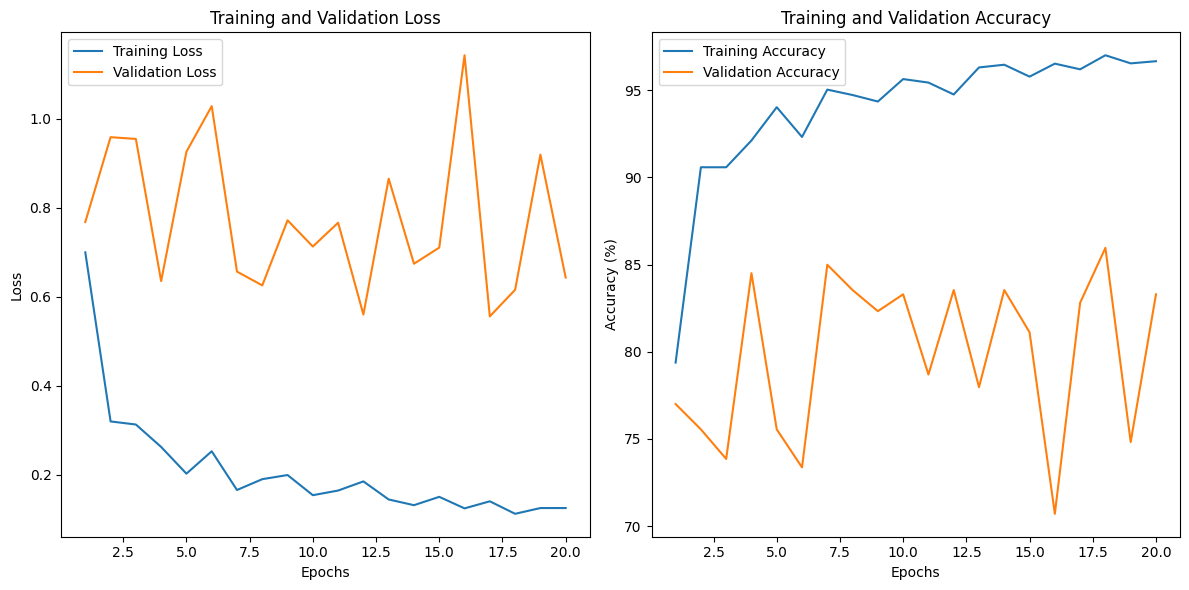

In [13]:
import matplotlib.pyplot as plt

# Plotting results
plt.figure(figsize=(12, 6))

# Plot training and validation losses
plt.subplot(1, 2, 1)
plt.plot(range(1, epochs + 1), train_losses, label='Training Loss')
plt.plot(range(1, epochs + 1), val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Plot training and validation accuracies
plt.subplot(1, 2, 2)
plt.plot(range(1, epochs + 1), train_accuracies, label='Training Accuracy')
plt.plot(range(1, epochs + 1), val_accuracies, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [16]:
test_dataset = ImageFolder(root='/kaggle/input/jute-pest/Jute_Pest_Dataset/Jute_Pest_Dataset/test', transform=transform)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

Test Loss: 0.3375, Test Accuracy: 88.65%


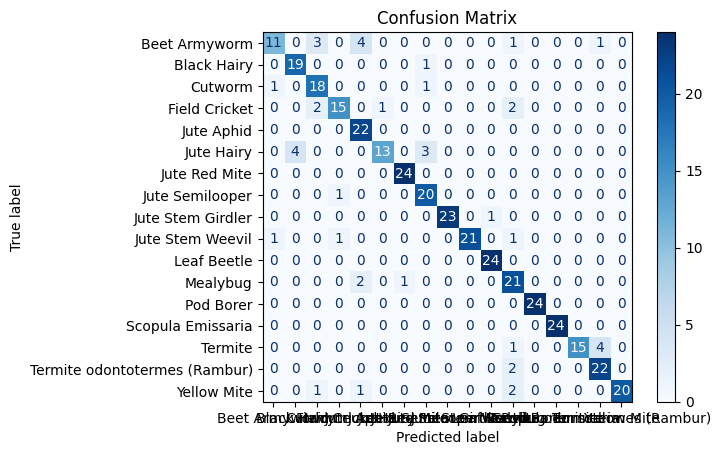

In [18]:
from tqdm import tqdm
import torch
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Testing Function with Confusion Matrix
def test_model_with_confusion_matrix(model, test_loader, criterion, device, class_names):
    
    model.eval()  # Set model to evaluation mode
    test_loss = 0.0
    total = 0
    correct = 0

    all_preds = []
    all_labels = []

    with torch.no_grad():  # Disable gradient computation for testing
        test_progress = tqdm(test_loader, desc="Testing", leave=False)
        for images, labels in test_progress:
            images, labels = images.to(device), labels.to(device)

            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, labels)

            # Predictions
            _, predicted = torch.max(outputs, 1)
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

            # Accuracy metrics
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

            # Accumulate weighted loss
            test_loss += loss.item() * images.size(0)

    # Calculate average loss and accuracy
    test_loss = test_loss / len(test_loader.dataset)
    test_accuracy = 100 * correct / total

    # Confusion Matrix
    conf_matrix = confusion_matrix(all_labels, all_preds)
    print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%")

    # Display Confusion Matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=class_names)
    disp.plot(cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.show()

    return test_loss, test_accuracy, conf_matrix

# Evaluate the trained model
criterion = torch.nn.CrossEntropyLoss()  # Define your loss function if not already defined
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)  # Ensure the model is on the correct device

# List of class names
class_names = test_dataset.classes  # Automatically extracts class names from the dataset
test_loss, test_accuracy, conf_matrix = test_model_with_confusion_matrix(model, test_loader, criterion, device, class_names)
